In [1]:
# Import libraries
import random
import matplotlib.pyplot as plt

In [2]:
# Knapsack Problem parameters
items = [
    {"name": "Item 1", "weight": 5, "value": 1},
    {"name": "Item 2", "weight": 1, "value": 8},
    {"name": "Item 3", "weight": 6, "value": 5},
    {"name": "Item 4", "weight": 2, "value": 10},
    {"name": "Item 5", "weight": 3, "value": 6},
    {"name": "Item 6", "weight": 9, "value": 2},
    {"name": "Item 7", "weight": 7, "value": 4},
]

knapsack_capacity = 22

In [3]:
# Genetic Algorithm parameters
population_size = 100
mutation_rate = 0.05
num_generations = 250

In [4]:
# Create initial population
def create_individual(): 
    return [random.randint(0, 1) for i in range(len(items))]

In [5]:
def create_population():  
    return [create_individual() for _ in range(population_size)]

In [6]:
# Evaluate fitness of an individual
def evaluate_fitness(individual):
    total_value = 0
    total_weight = 0
    for i in range(len(items)):
        if individual[i] == 1:
            total_value += items[i]['value']
            total_weight += items[i]['weight']
    if total_weight > knapsack_capacity:
        total_value = 0
    return total_value

In [7]:
# Select parents for crossover using a roulette wheel selection
def select_parents(population):
    fitness_values = [evaluate_fitness(individual) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    parents = random.choices(population, weights=probabilities, k=2)
    return parents[0], parents[1]

In [8]:
# Perform crossover using a single-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [9]:
# Perform mutation by flipping bits with a given probability
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]

In [10]:
# Run the genetic algorithm
def genetic_algorithm():
    population = create_population()

    for _ in range(num_generations):
        new_population = []

        # Create new individuals through crossover and mutation
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])

        population = new_population

    # Find the best individual (highest fitness) in the final population
    best_individual = max(population, key=evaluate_fitness)
    best_fitness = evaluate_fitness(best_individual)
    return best_individual, best_fitness

In [11]:
# Run the genetic algorithm and print the results
best_solution, best_fitness = genetic_algorithm()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

Best Solution: [0, 1, 1, 1, 1, 0, 1]
Best Fitness: 33


Experimental Analysis

In [12]:
# Knapsack Problem parameters
items = [
    {"name": "Item 1", "weight": 2, "value": 1},
    {"name": "Item 2", "weight": 1, "value": 2},
    {"name": "Item 3", "weight": 6, "value": 5},
    {"name": "Item 4", "weight": 4, "value": 3},
    {"name": "Item 5", "weight": 3, "value": 6},
    {"name": "Item 6", "weight": 8, "value": 9},
    {"name": "Item 7", "weight": 7, "value": 7},
]

knapsack_capacity = 20

In [13]:
# Genetic Algorithm parameters
population_size = 150
mutation_rate = 0.1
num_generations = 200

In [14]:
# Create initial population
def create_individual(): 
    return [random.randint(0, 1) for i in range(len(items))]

def create_population():  
    return [create_individual() for _ in range(population_size)]

In [15]:
# Evaluate fitness of an individual
def evaluate_fitness(individual):
    total_value = 0
    total_weight = 0
    for i in range(len(items)):
        if individual[i] == 1:
            total_value += items[i]['value']
            total_weight += items[i]['weight']
    if total_weight > knapsack_capacity:
        total_value = 0
    return total_value

In [16]:
# Select parents for crossover using a roulette wheel selection
def select_parents(population):
    fitness_values = [evaluate_fitness(individual) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    parents = random.choices(population, weights=probabilities, k=2)
    return parents[0], parents[1]

In [17]:
# Perform crossover using a single-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [18]:
# Perform mutation by flipping bits with a given probability
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]

In [19]:
# Run the genetic algorithm
def genetic_algorithm():
    population = create_population()

    for _ in range(num_generations):
        new_population = []

        # Create new individuals through crossover and mutation
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_population.extend([child1, child2])

        population = new_population

    # Find the best individual (highest fitness) in the final population
    best_individual = max(population, key=evaluate_fitness)
    best_fitness = evaluate_fitness(best_individual)
    return best_individual, best_fitness

In [20]:
# Run the genetic algorithm and print the results
best_solution, best_fitness = genetic_algorithm()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

Best Solution: [0, 1, 0, 0, 1, 1, 1]
Best Fitness: 24


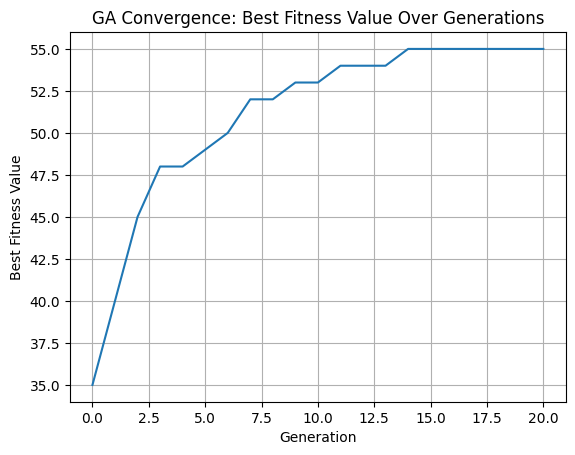

In [21]:
# Mock data for plotting the convergence
best_fitness = [35, 40, 45, 48, 48, 49, 50, 52, 52, 53, 53, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55]  # Example values

# Plot the convergence
plt.plot(best_fitness)
plt.title('GA Convergence: Best Fitness Value Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

Greedy Algorithm

In [25]:
# Greedy Algorithm
def greedy_algorithm(items, knapsack_capacity):
    # Sort items by value-to-weight ratio
    items_sorted = sorted(items, key=lambda x: x[1] / x[0], reverse=True)
    
    total_value = 0
    total_weight = 0
    for item in items_sorted:
        if total_weight + item[0] <= knapsack_capacity:
            total_weight += item[0]
            total_value += item[1]
    return total_value

# Running the Greedy Algorithm
items = [(2, 1), (1, 2), (6, 5), (4, 3), (3, 6), (8, 9), (7, 7)]
knapsack_capacity = 70
best_selection = greedy_algorithm(items, knapsack_capacity)

print("Best Selection:", best_selection)

Best Selection: 33
